[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1LW0GI832qnoir1z34Qarkswt0ILyEE4g)

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [40]:
def read_data(filename):
    """
    Reads data from the passed-in file, returning a pair of matrices (x, y)
    where each row x[i] is a d-dimensional training point with corresponding
    label y[i].
    """
    data = np.loadtxt(filename, comments='#', delimiter=',')
    # The first column of each row is the label y
    y = data[:,0]
    x = data[:,1:]
    # Add bias column
    x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    return (x, y)

In [41]:
import requests

url_dict = {
    'wine_training1.txt': 'https://drive.google.com/uc?export=download&id=178ewdrScC06GzCV5QzwLNLI6SYjdrGHP',
    'wine_training2.txt': 'https://drive.google.com/uc?export=download&id=16va8tYrEim6ODQo7HJq-oJ2Cd-eOITw2',
    'wine_validation.txt': 'https://drive.google.com/uc?export=download&id=1ml7m8HEeZABtNhgec6nJfb4kVLsFyxlx',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [42]:
def normalize_data(x, mean, std):
    # Check if standard deviation is zero
    std_nonzero = np.where(std != 0, std, 1.0)  # Replace zeros with 1.0

    # Normalize data
    normalized_data = (x - mean) / std_nonzero

    return normalized_data

In [44]:
# Download files
download_file('wine_training1.txt')
download_file('wine_training2.txt')
download_file('wine_validation.txt')

# Read in training data
x1, y1 = read_data('wine_training1.txt')
x2, y2 = read_data('wine_training2.txt')

# Read in validation data
xvalid, yvalid = read_data('wine_validation.txt')




# Normalization for Training Data
meanx1 = np.mean(x1, axis = 0)
meanx2 = np.mean(x2, axis = 0)
stdx1 = np.std(x1, axis = 0)
stdx2 = np.std(x2, axis = 0)

x1 = normalize_data(x1, meanx1, stdx1)
x1 = np.insert(x1, 0, 1, axis=1)  # Add bias term

x2 = normalize_data(x2, meanx2, stdx2)
x2 = np.insert(x2, 0, 1, axis=1)  # Add bias term

# Normalization for Validation Data
xvalid = normalize_data(xvalid, meanx1, stdx1)
xvalid = np.insert(xvalid, 0, 1, axis=1)  # Add bias term

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
(100, 15)
(40, 15)
(30, 15)


In [45]:
def loss(X, Y, w):
    '''
    Calculate the log loss.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    loss = -1 * np.mean(np.log(1 / (1 + np.exp(-1 * Y * np.dot(X, w)))))
    return loss

def gradient(x, y, w, l, N):
    '''
    Calculate the gradient of (regularized) logistic error function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        l: lambda regularization term
        N: size of sample

    Output:
        The gradient of the loss with respect to x, y, and w.
    '''

    gradient = (-1 * y * x) / (1 + np.exp(y * np.dot(x, w))) + (2 * l / N * w)
    return gradient

def SGD(X, Y, w_start, eta, N_epochs, l):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        l: lambda regularization term

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    '''

    N = len(X)
    w = w_start
    for e in range(N_epochs):
      for n in np.random.permutation(N):
        w -= eta * gradient(X[n], Y[n], w, l, N)
    return w

In [49]:
lambda_1 = 0.00001
lambdas = [lambda_1 * pow(5,i) for i in range(15)]
N_epochs = 20000
eta = 5e-4

in_sample_error_1 = []
in_sample_error_2 = []
out_sample_error_1 = []
out_sample_error_2 = []
l2_1 = []
l2_2 = []

for l in lambdas:
  w_start_1 = np.random.random(15) * 0.1
  w1 = SGD(x1, y1, w_start_1, eta, N_epochs, l)
  in_sample_error_1.append(loss(x1, y1, w1))
  out_sample_error_1.append(loss(xvalid, yvalid, w1))
  l2_1.append(np.linalg.norm(w1))

  w_start_2 = np.random.random(15) * 0.1
  w2 = SGD(x2, y2, w_start_2, eta, N_epochs, l)
  in_sample_error_2.append(loss(x2, y2, w2))
  out_sample_error_2.append(loss(xvalid, yvalid, w2))
  l2_2.append(np.linalg.norm(w2))


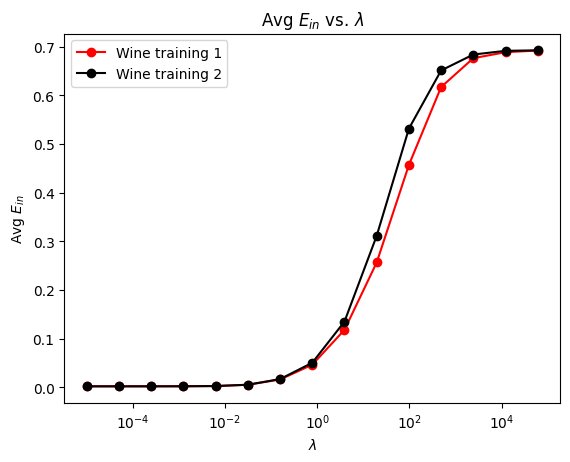

In [50]:
plt.figure()
plt.title("Avg $E_{in}$ vs. $\lambda$")
plt.xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("Avg $E_{in}$")
plt.plot(lambdas, in_sample_error_1, "-o", color = "red")
plt.plot(lambdas, in_sample_error_2, "-o", color = "black")
plt.legend(["Wine training 1", "Wine training 2"], loc = 2)
plt.show()

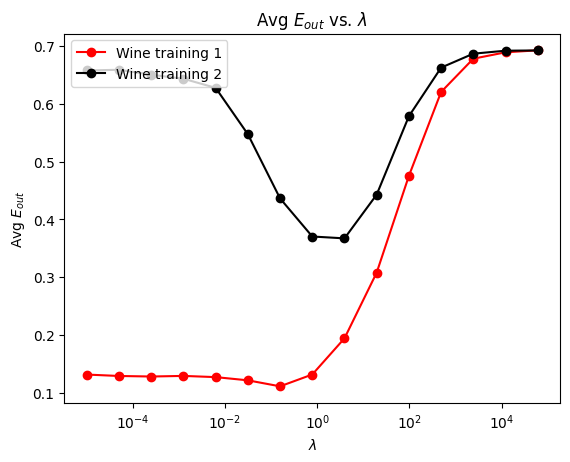

In [51]:
# Average test error vs. different lambdas
plt.figure()
plt.title("Avg $E_{out}$ vs. $\lambda$")
plt.xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("Avg $E_{out}$")
plt.plot(lambdas, out_sample_error_1, "-o", color = "red")
plt.plot(lambdas, out_sample_error_2, "-o", color = "black")
plt.legend(["Wine training 1", "Wine training 2"], loc = 2)
plt.show()

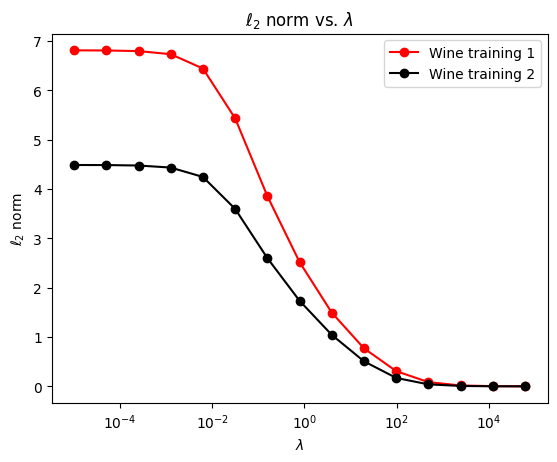

In [52]:
# l2 Norm of w vs. different lambdas
plt.figure()
plt.title("$\ell_2$ norm vs. $\lambda$")
plt.xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("$\ell_2$ norm")
plt.plot(lambdas, l2_1, "-o", color = "red")
plt.plot(lambdas, l2_2, "-o", color = "black")
plt.legend(["Wine training 1", "Wine training 2"], loc = 1)
plt.show()